In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, plot_roc_curve,accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## **Load Data**

In [2]:
app_train = pd.read_csv('application_train.csv')
print('Shape:',app_train.shape)
app_train.head()

Shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_train.keys()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## **EDA**

0.0    91.927118
1.0     8.072882
Name: TARGET, dtype: float64


<AxesSubplot:xlabel='TARGET', ylabel='count'>

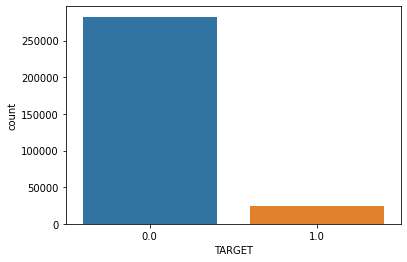

In [43]:
print(app_train['TARGET'].value_counts()/len(app_train)*100)
sns.countplot(app_train['TARGET'])

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

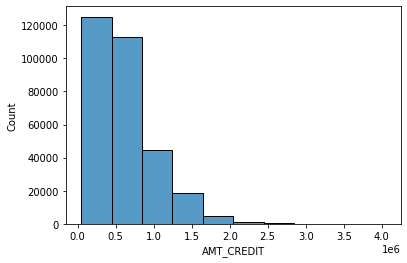

In [6]:
sns.histplot(app_train['AMT_CREDIT'], bins=10)

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

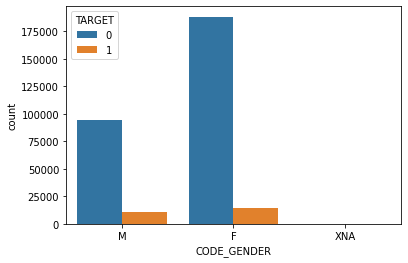

In [7]:
sns.countplot(data=app_train, x='CODE_GENDER', hue='TARGET')

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Count'>

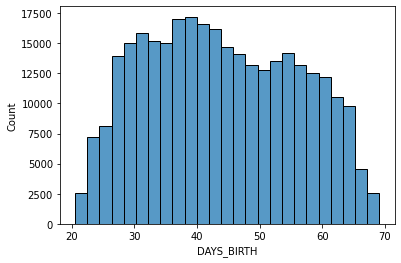

In [8]:
sns.histplot(data=app_train, x= app_train['DAYS_BIRTH']/-365, bins=25)

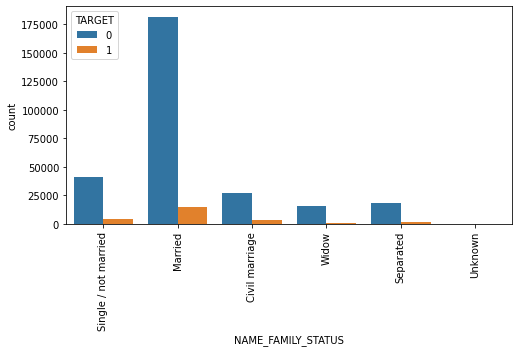

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(data=app_train, x='NAME_FAMILY_STATUS', hue='TARGET')
plt.xticks(rotation=90);

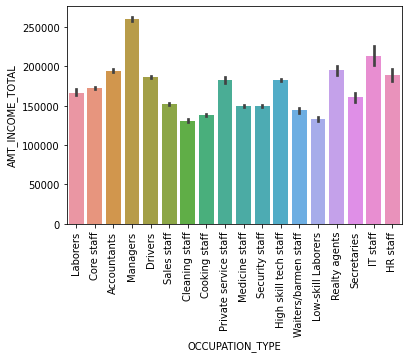

In [10]:
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=app_train)
plt.xticks(rotation=90);

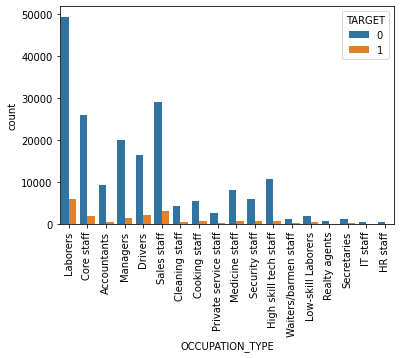

In [11]:
sns.countplot(x='OCCUPATION_TYPE',hue='TARGET',data=app_train)
plt.xticks(rotation=90);

## **Feature Selection**

In [12]:
corr = app_train.corr()['TARGET'].abs().sort_values(ascending=False)

In [13]:
corr[:15]

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
Name: TARGET, dtype: float64

In [14]:
app_train = app_train[corr[:15].keys()]

In [15]:
app_train

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,DAYS_EMPLOYED,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,FLOORSMAX_AVG
0,1,0.139376,0.262949,0.083037,-9461,2,2,-1134.0,-2120,0,1,-637,0,1,0.0833
1,0,NaN,0.622246,0.311267,-16765,1,1,-828.0,-291,0,1,-1188,0,1,0.2917
2,0,0.729567,0.555912,NaN,-19046,2,2,-815.0,-2531,0,1,-225,0,0,NaN
3,0,NaN,0.650442,NaN,-19005,2,2,-617.0,-2437,0,1,-3039,0,1,NaN
4,0,NaN,0.322738,NaN,-19932,2,2,-1106.0,-3458,1,1,-3038,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,NaN,0.681632,0.145570,-9327,1,1,-273.0,-1982,0,1,-236,0,0,0.6042
307507,0,NaN,0.115992,NaN,-20775,2,2,0.0,-4090,0,0,365243,0,1,0.0833
307508,0,0.218859,0.535722,0.744026,-14966,3,3,-1909.0,-5150,1,1,-7921,0,1,0.1667
307509,1,0.661024,0.514163,NaN,-11961,2,2,-322.0,-931,1,1,-4786,1,1,0.0417


## **Feature Engineering**

Mengatasi Outlier

In [16]:
app_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000
EXT_SOURCE_3,246546.0,0.510853,0.194844,5.272652e-04,0.370650,0.535276,0.669057,0.896010
EXT_SOURCE_2,306851.0,0.514393,0.191060,8.173617e-08,0.392457,0.565961,0.663617,0.855000
EXT_SOURCE_1,134133.0,0.502130,0.211062,1.456813e-02,0.334007,0.505998,0.675053,0.962693
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7489.000000
REGION_RATING_CLIENT_W_CITY,307511.0,2.031521,0.502737,1.000000e+00,2.000000,2.000000,2.000000,3.000000
REGION_RATING_CLIENT,307511.0,2.052463,0.509034,1.000000e+00,2.000000,2.000000,2.000000,3.000000
DAYS_LAST_PHONE_CHANGE,307510.0,-962.858788,826.808487,-4.292000e+03,-1570.000000,-757.000000,-274.000000,0.000000
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7.197000e+03,-4299.000000,-3254.000000,-1720.000000,0.000000
REG_CITY_NOT_WORK_CITY,307511.0,0.230454,0.421124,0.000000e+00,0.000000,0.000000,0.000000,1.000000


In [17]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].apply(lambda x: np.nan if x == 365243 else x)

Mengatasi Mising Value

In [18]:
app_train.isna().sum()

TARGET                              0
EXT_SOURCE_3                    60965
EXT_SOURCE_2                      660
EXT_SOURCE_1                   173378
DAYS_BIRTH                          0
REGION_RATING_CLIENT_W_CITY         0
REGION_RATING_CLIENT                0
DAYS_LAST_PHONE_CHANGE              1
DAYS_ID_PUBLISH                     0
REG_CITY_NOT_WORK_CITY              0
FLAG_EMP_PHONE                      0
DAYS_EMPLOYED                   55374
REG_CITY_NOT_LIVE_CITY              0
FLAG_DOCUMENT_3                     0
FLOORSMAX_AVG                  153020
dtype: int64

In [19]:
imputer = IterativeImputer()

app_train = pd.DataFrame(imputer.fit_transform(app_train), columns = app_train.columns)

In [20]:
app_train.isna().sum().sum()

0

## **Training and Testing**

In [21]:
X = app_train.drop('TARGET', axis=1)
y = app_train['TARGET']

In [22]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 7)

## **Model**

Logistic Regression

In [25]:
log = LogisticRegression().fit(X_train, y_train)

In [26]:
log_predict = log.predict(X_test)
log_score = log.score(X_test, y_test)
log_score

0.9191037786979427

[[84525   282]
 [ 7181   266]]


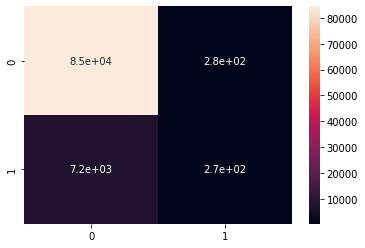

In [27]:
cf_matrix = confusion_matrix(y_test, log_predict)
sns.heatmap(cf_matrix, annot=True)
print(cf_matrix)

In [28]:
print(classification_report(y_test,log_predict))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84807
         1.0       0.49      0.04      0.07      7447

    accuracy                           0.92     92254
   macro avg       0.70      0.52      0.51     92254
weighted avg       0.89      0.92      0.89     92254



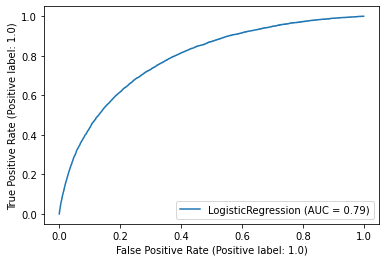

In [29]:
plot_roc_curve(log,X_test,y_test)

KNN

In [30]:
n = 7
knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)

In [31]:
knn_predict = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
knn_score

0.9193097318273462

<AxesSubplot:>

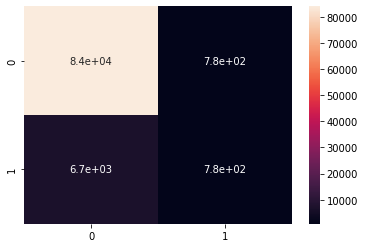

In [32]:
cf_matrix = confusion_matrix(y_test, knn_predict)
sns.heatmap(cf_matrix, annot=True)

In [33]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     84807
         1.0       0.50      0.11      0.17      7447

    accuracy                           0.92     92254
   macro avg       0.71      0.55      0.57     92254
weighted avg       0.89      0.92      0.89     92254



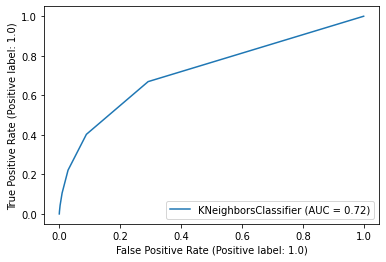

In [34]:
plot_roc_curve(knn,X_test,y_test)

Random Forest

In [35]:
Tree = RandomForestClassifier(n_estimators=10, max_features='auto',random_state=7).fit(X_train, y_train)

In [36]:
Tree_predict = Tree.predict(X_test)
Tree_score = Tree.score(X_test, y_test)
Tree_score

0.928620981204067

<AxesSubplot:>

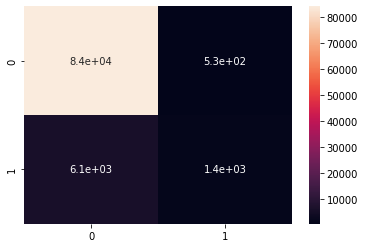

In [37]:
cf_matrix = confusion_matrix(y_test, Tree_predict)
sns.heatmap(cf_matrix, annot=True)

In [38]:
print(classification_report(y_test,Tree_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     84807
         1.0       0.72      0.19      0.30      7447

    accuracy                           0.93     92254
   macro avg       0.83      0.59      0.63     92254
weighted avg       0.92      0.93      0.91     92254



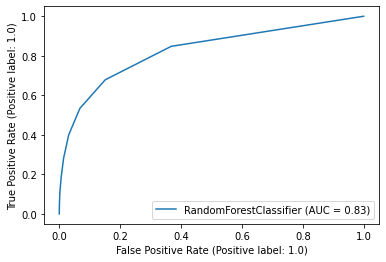

In [39]:
plot_roc_curve(Tree,X_test,y_test)